# Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import geopandas as gpd
import numpy as np

from fuzzywuzzy import process
from fuzzywuzzy import fuzz

pd.set_option("display.precision", 3)

# Load data

In [2]:
df = pd.read_csv('../data/2022-10-24-clean.csv')
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,China,2.576e+05,221.0,5.226e+03,NaN,2.486e+05,311.0,3.784e+03,15.0,179.0,4.0,1.600e+08,1.112e+05,1.439e+09,Asia
1,USA,9.912e+07,14414.0,1.093e+06,91.0,9.659e+07,45824.0,1.439e+06,2613.0,295722.0,3261.0,1.127e+09,3.362e+06,3.352e+08,North America
2,India,4.464e+07,862.0,5.290e+05,3.0,4.409e+07,1503.0,2.255e+04,698.0,31633.0,375.0,9.001e+08,6.377e+05,1.411e+09,Asia
3,France,3.661e+07,6907.0,1.565e+05,122.0,3.542e+07,89135.0,1.033e+06,869.0,557970.0,2386.0,2.715e+08,4.138e+06,6.561e+07,Europe
4,Germany,3.529e+07,115535.0,1.528e+05,273.0,3.340e+07,98600.0,1.739e+06,1406.0,418094.0,1810.0,1.223e+08,1.449e+06,8.440e+07,Europe


# Z-score

In [3]:
def z_score(x):
    return (x-x.mean())/x.std()

# Top 10 Countries With The Most Covid-19 Cases 

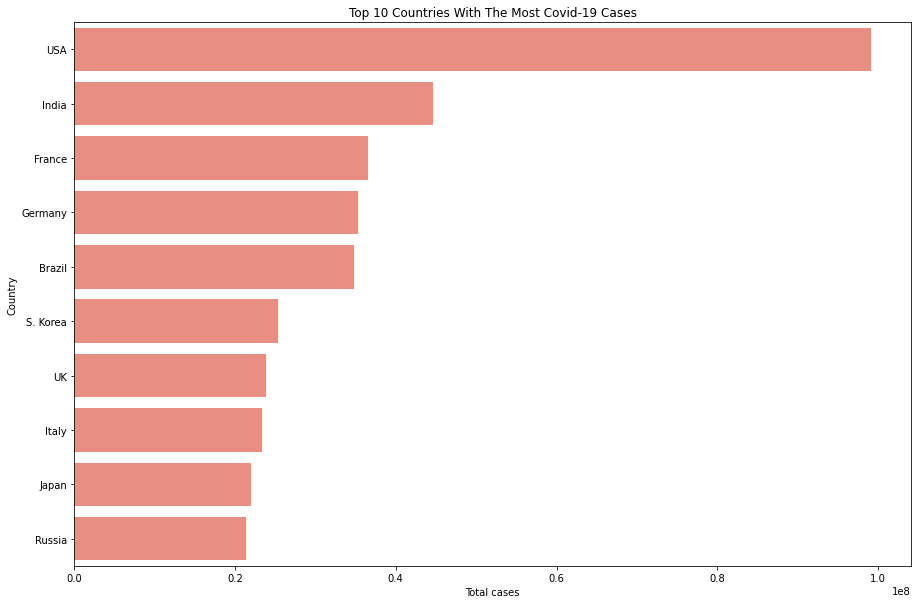

In [4]:
top10_total_index = df['TotalCases'].values.argsort()[::-1]
top10_total = df.iloc[top10_total_index[:10]]

plt.figure(figsize=(15,10))
sns.barplot(data=top10_total,x='TotalCases',y='Country,Other',color="salmon")
plt.title("Top 10 Countries With The Most Covid-19 Cases")
plt.ylabel("Country")
plt.xlabel("Total cases")

plt.savefig('../img/fig1.png')
plt.show()

# Top 10 Countries With The Highest Population-to-Case Ratio

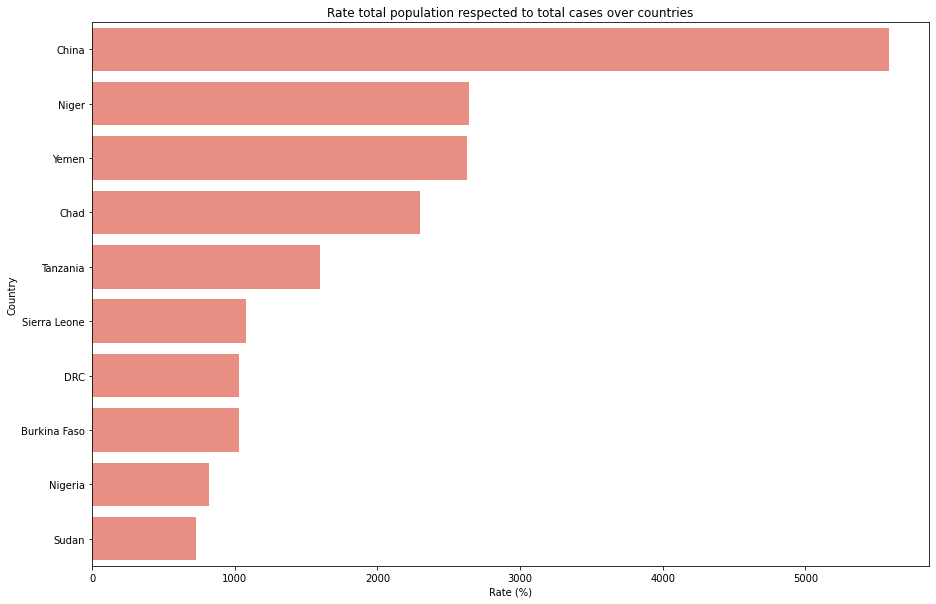

In [5]:
df_rate_case_pop = df['Population']/df['TotalCases'] 
index = df_rate_case_pop.argsort()[::-1][:10]
top10_rate_case_pop = df.iloc[index]
top10_rate_case_pop['Rate'] = df_rate_case_pop[index]

plt.figure(figsize=(15,10))
sns.barplot(data=top10_rate_case_pop,y='Country,Other',x='Rate', color="salmon")
plt.xlabel("Rate (%)")
plt.ylabel("Country")
plt.title("Rate total population respected to total cases over countries")
plt.savefig("../img/fig2.png")
plt.show()

# Create dataframe by groupping by continent

In [6]:
df_continent = df.groupby("Continent").sum()
df_continent = df_continent.reset_index()
df_continent.head()

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,Africa,1.267e+07,2093.0,2.578e+05,2.0,1.088e+07,1682.0,3.227e+05,899.0,2.371e+06,18310.0,1.087e+08,1.079e+07,1.414e+09
1,Asia,1.711e+08,77868.0,1.385e+06,202.0,1.650e+08,107799.0,4.440e+06,9478.0,6.646e+06,31677.0,2.143e+09,8.774e+07,4.600e+09
2,Australia/Oceania,1.256e+07,3393.0,2.147e+04,5.0,1.229e+07,2036.0,1.495e+05,93.0,3.334e+06,8147.0,8.829e+07,2.022e+07,4.373e+07
3,Europe,2.334e+08,157566.0,1.937e+06,672.0,2.255e+08,277883.0,5.703e+06,9880.0,1.782e+07,120139.0,2.776e+09,2.084e+08,7.487e+08
4,North America,1.175e+08,14666.0,1.550e+06,94.0,1.128e+08,48710.0,2.307e+06,7773.0,8.543e+06,56541.0,1.260e+09,9.875e+07,5.995e+08


# Comparing The Number Of Covid-19 Cases Between Continents

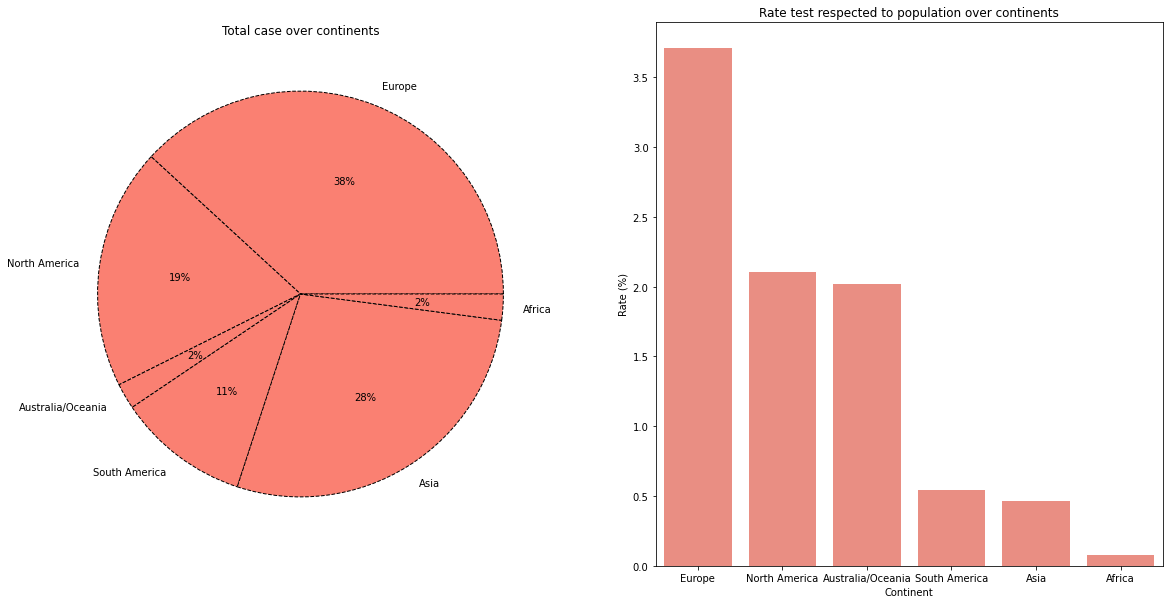

In [7]:
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1,2,figsize=(20,10))

rate_test_pop_continent = df_continent['TotalTests']/df_continent['Population']
index = rate_test_pop_continent.values.argsort()[::-1]
df_rate_test_pop_continent = df_continent.iloc[index]
df_rate_test_pop_continent['Test/pop'] = rate_test_pop_continent[index]

ax[0].pie(x=df_rate_test_pop_continent['TotalCases'],
            labels=df_rate_test_pop_continent['Continent'],
            autopct='%.0f%%',
            wedgeprops = {'edgecolor':'k', 'linestyle': 'dashed'},
            colors=len(df_rate_test_pop_continent['TotalCases'])*["salmon"])
ax[0].set_title("Total case over continents")

sns.barplot(ax=ax[1],y=df_rate_test_pop_continent['Test/pop'],x=df_rate_test_pop_continent['Continent'],color="salmon")
ax[1].set_title("Rate test respected to population over continents")
ax[1].set_xlabel("Continent")
ax[1].set_ylabel("Rate (%)")

plt.savefig('../img/fig3.png')
plt.show()

# Pairplot for checking relationship

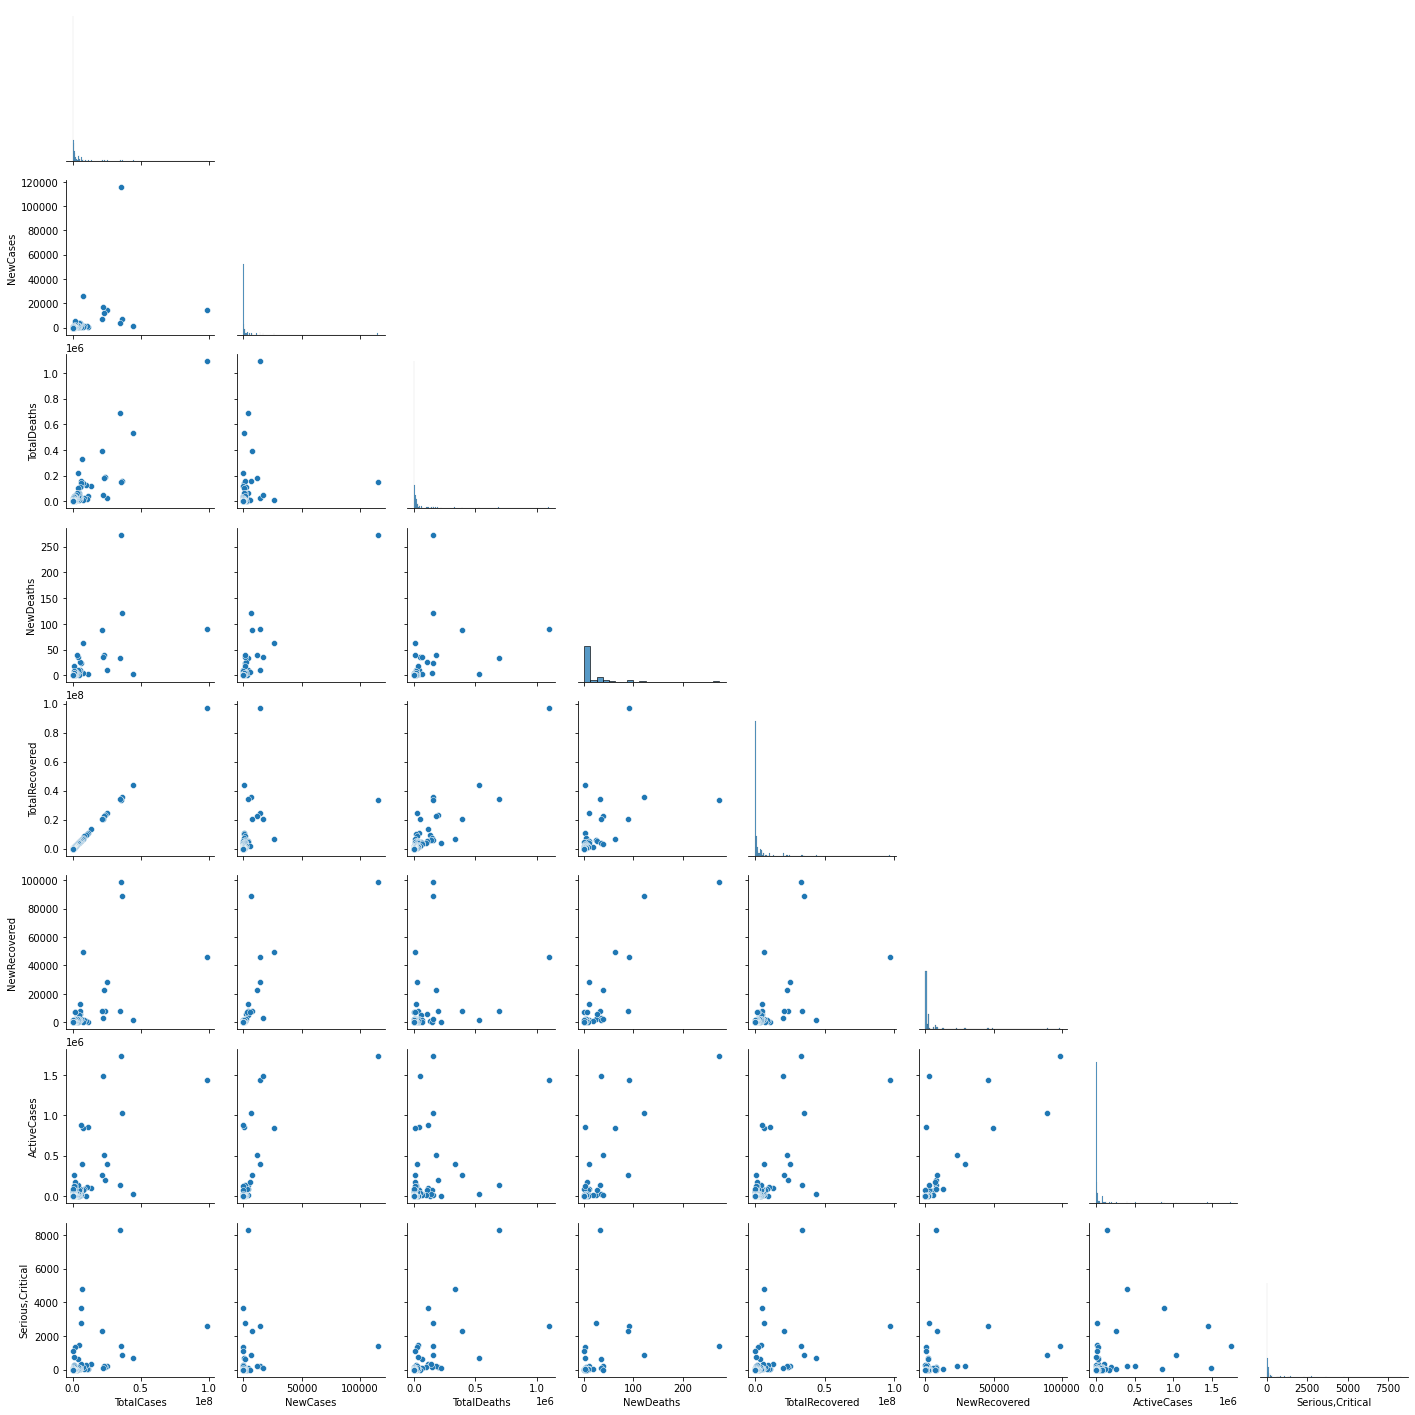

In [8]:
sns.pairplot(data=df,vars=['TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious,Critical'],corner=True)
plt.show()

# Pearson's correlation

In [9]:
corr = df.corr()
corr.style.background_gradient()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
TotalCases,1.000000,0.401829,0.889010,0.538715,0.999870,0.603786,0.703351,0.461169,0.148004,0.211297,0.856097,0.056021,0.388713
NewCases,0.401829,1.000000,0.183604,0.884641,0.392186,0.769403,0.695095,0.149659,0.207782,0.035394,0.160278,0.010857,0.029065
TotalDeaths,0.889010,0.183604,1.000000,0.344574,0.889683,0.336768,0.471830,0.680426,0.018261,0.281520,0.787287,-0.005463,0.418045
NewDeaths,0.538715,0.884641,0.344574,1.000000,0.530389,0.876942,0.761709,0.269604,0.235166,0.094205,0.295295,0.041797,0.057719
TotalRecovered,0.999870,0.392186,0.889683,0.530389,1.000000,0.597123,0.692317,0.454513,0.173071,0.215816,0.858987,0.066706,0.389056
NewRecovered,0.603786,0.769403,0.336768,0.876942,0.597123,1.000000,0.789575,0.222596,0.316796,0.069717,0.348042,0.072475,0.039535
ActiveCases,0.703351,0.695095,0.471830,0.761709,0.692317,0.789575,1.000000,0.323564,0.182724,0.132102,0.439232,0.019848,0.119447
"Serious,Critical",0.461169,0.149659,0.680426,0.269604,0.454513,0.222596,0.323564,1.000000,-0.096353,0.171670,0.240510,-0.099098,0.194737
Tot Cases/1M pop,0.148004,0.207782,0.018261,0.235166,0.173071,0.316796,0.182724,-0.096353,1.000000,0.465371,0.093086,0.564502,-0.144912
Deaths/1M pop,0.211297,0.035394,0.281520,0.094205,0.215816,0.069717,0.132102,0.171670,0.465371,1.000000,0.155717,0.213188,-0.079807


# Heatmap of correlation

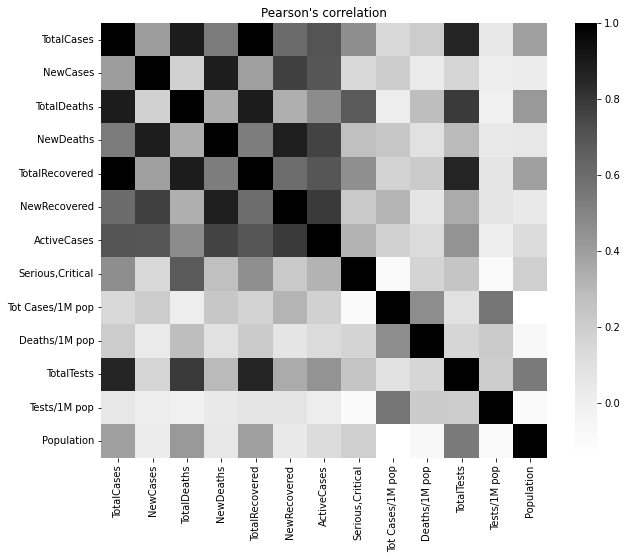

In [10]:
plt.figure(figsize=(10,8))
plt.title("Pearson's correlation")
sns.heatmap(corr,cmap='Greys')
plt.show()

# Sorting correlation of total case

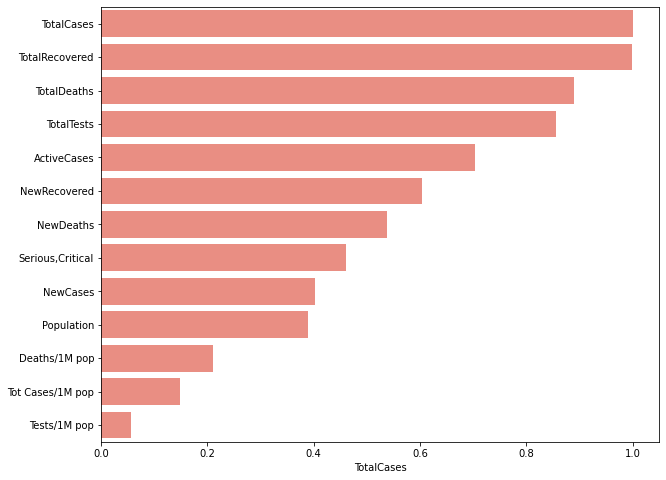

In [11]:
corr_total_cases = corr['TotalCases']
corr_total_cases = corr_total_cases.sort_values()[::-1]

plt.figure(figsize=(10,8))
sns.barplot(y=corr_total_cases.index,x=corr_total_cases,color='salmon')
plt.show()

# Death-to-case ratio between countries

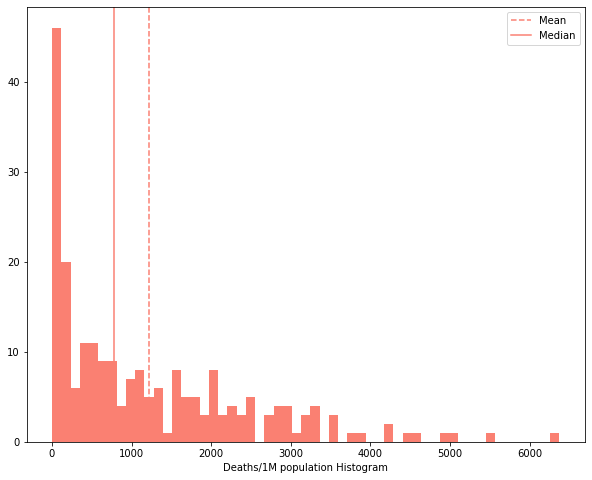

In [12]:
mean = df['Deaths/1M pop'].mean()
median = df['Deaths/1M pop'].median() 

plt.figure(figsize=(10,8))
plt.hist(df['Deaths/1M pop'],bins = len(df)//4, color='salmon')

plt.axvline(mean, color='salmon', linestyle='--', label="Mean")
plt.axvline(median, color='salmon', linestyle='-', label="Median")

plt.legend()
plt.xlabel('Deaths/1M population Histogram')
plt.savefig('../img/fig4.png')
plt.show()

# Relationship log-log of death and serious 

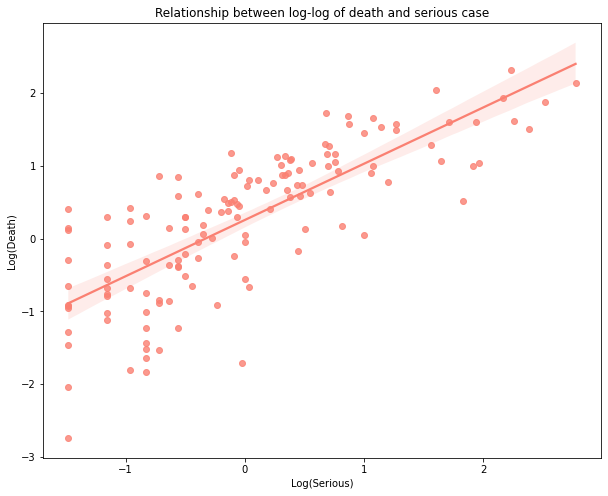

In [13]:
df['Serious_Log_Std'] = z_score(np.log(df['Serious,Critical']))
df['TotalDeaths_Log_Std'] = z_score(np.log(df['TotalDeaths']))

plt.figure(figsize=(10,8))

sns.regplot(data=df,x='Serious_Log_Std',y='TotalDeaths_Log_Std',color='salmon')
plt.xlabel("Log(Serious)")
plt.ylabel("Log(Death)")
plt.title("Relationship between log-log of death and serious case")

plt.savefig("../img/fig5.png")
plt.show()

In [14]:
result = smf.ols(' Q("TotalDeaths_Log_Std") ~ Q("Serious_Log_Std")',data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("TotalDeaths_Log_Std")   R-squared:                       0.608
Model:                                  OLS   Adj. R-squared:                  0.606
Method:                       Least Squares   F-statistic:                     212.8
Date:                      Thu, 27 Oct 2022   Prob (F-statistic):           1.12e-29
Time:                              20:49:03   Log-Likelihood:                -130.40
No. Observations:                       139   AIC:                             264.8
Df Residuals:                           137   BIC:                             270.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2555      0.053      4.837      0.000       0.151       0.360
Q("Serious_Log_Std")     0.7734      0.053     14.589      0.000       0.669       0.878
==============================================================================
Omnibus:                        9.780   Durbin-Watson:                   1.019
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.868
Skew:                          -0.636   Prob(JB):                      0.00720
Kurtosis:                       3.294   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dead and recovery rate

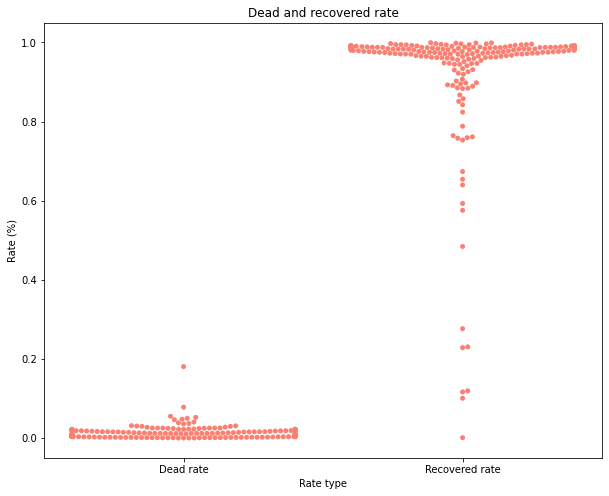

In [15]:
df_rate = pd.DataFrame(df['Country,Other'])
df_rate['Dead rate'] = df['TotalDeaths'] / df['TotalCases'] 
df_rate['Recovered rate'] = df['TotalRecovered'] / df['TotalCases'] 

plt.figure(figsize=(10,8))
df_rate = df_rate.melt('Country,Other',var_name='Rate type', value_name='Rate (%)')
sns.swarmplot(data=df_rate,y='Rate (%)',x='Rate type',color='salmon')
plt.title("Dead and recovered rate")
plt.savefig('../img/fig6.png')
plt.show()

In [16]:
df['TotalCases_Std'] = z_score(df['TotalCases'])
df['TotalDeaths_Std'] = z_score(df['TotalDeaths'])
df['TotalRecovered_Std'] = z_score(df['TotalRecovered'])

result = smf.ols('TotalCases_Std ~ TotalRecovered_Std + TotalDeaths_Std',data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalCases_Std   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.938e+05
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:49:05   Log-Likelihood:                 544.85
No. Observations:                 203   AIC:                            -1084.
Df Residuals:                     200   BIC:                            -1074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0225      0.001     19.263      0.000       0.020       0.025
TotalRecovered_Std     1.0400      0.003    407.179      0.000       1.035       1.045
TotalDeaths_Std       -0.0055      0.002     -2.212      0.028      -0.010      -0.001
==============================================================================
Omnibus:                      179.437   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3733.637
Skew:                           3.267   Prob(JB):                         0.00
Kurtosis:                      22.968   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Total test less than total cases

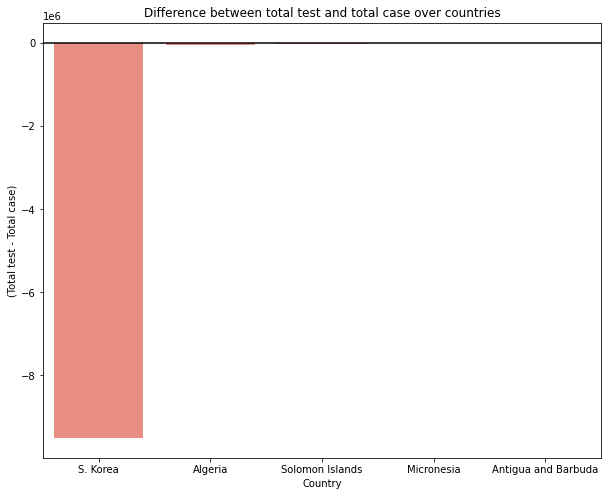

In [17]:
plt.figure(figsize=(10,8))

df_delta_test_total = df
df_delta_test_total['Delta'] = df['TotalTests']-df['TotalCases']
df_delta_test_total = df_delta_test_total.sort_values(by='Delta',ascending=True)[:5]

ax = sns.barplot(data=df_delta_test_total,x='Country,Other',y='Delta',color='salmon')
ax.axhline(0,color='black')

plt.xlabel("Country")
plt.ylabel("(Total test - Total case)")
plt.title("Difference between total test and total case over countries")
plt.savefig("../img/fig7.png")
plt.show()

# Define world map

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,8.900e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,5.801e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,6.033e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,3.759e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,3.282e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


# Cases on map over countries

In [19]:
countries = df['Country,Other']

def fuzzy_match(findStr, listAC, nElement=1):
    matches = process.extract(findStr, listAC, limit=nElement, scorer = fuzz.token_sort_ratio)
    return matches

for i, country in enumerate(countries):
    candidates = fuzzy_match(country,world['name'],1)
    if (candidates[0][1]<100 and candidates[0][1]>75):
        print(country,candidates)
        countries[i] = candidates[0][0]

countries.replace("USA","United States of America",inplace=True)
countries.replace("UAE","United Arab Emirates",inplace=True)
countries.replace("UK","United Kingdom",inplace=True)

df['Country'] = countries
df['Rate_case'] = df['Population']/df['TotalCases'] 
world_country = world.merge(df,how='left',left_on='name',right_on='Country')

S. Korea [('South Korea', 78, 96)]
Dominican Republic [('Dominican Rep.', 84, 17)]
Bosnia and Herzegovina [('Bosnia and Herz.', 81, 170)]
Solomon Islands [('Solomon Is.', 80, 135)]
South Sudan [('S. Sudan', 78, 176)]
Dominica [('Dominican Rep.', 76, 17)]


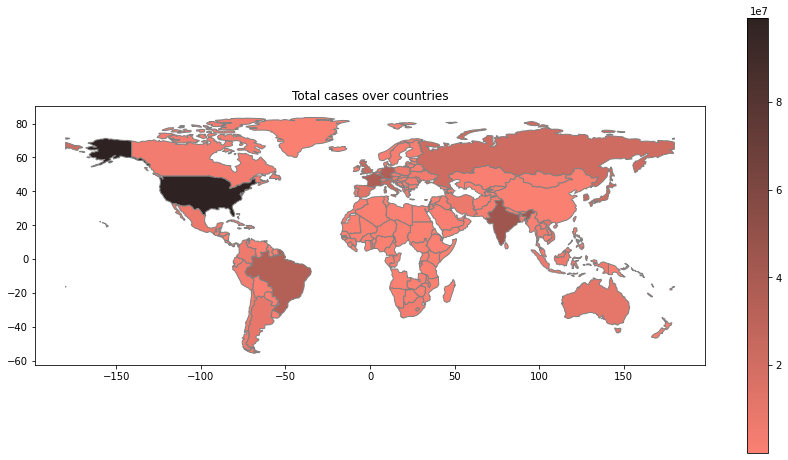

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
world_country.plot(column='TotalCases',ax=ax,legend=True,cmap=sns.color_palette("dark:salmon_r", as_cmap=True),edgecolors='grey')
plt.title("Total cases over countries")
plt.savefig("../img/fig8.png")
plt.show()